#                                            BUSA 650 - Business Analytics Group Project
#                                     Predicting Startup Success: An Investment-Based Approach

### Group members: 
#### Y Srivatsav 1338663
#### Geeta Sneha 
#### Deepesh

### Objective 
#### Startups are critical drivers of innovation and economic growth, yet many fail due to poor market fit, funding gaps, or competitive pressure. This project uses historical investment data to predict whether a startup will be **successful** (Operating/Acquired) or **unsuccessful** (Closed).
#### **Goals** 
- Build interpretable and effective models
- Maximize recall to minimize missed successful startups
- Compare Logistic Regression and Random Forest models

## Dataset Feature Descriptions – `investments_VC.csv`

This dataset contains information about startups and their funding histories. Below is a breakdown of each feature:

---

### Identification & Basic Info

- `permalink`: Unique identifier or URL slug for each startup.
- `name`: Name of the company or startup.
- `homepage_url`: Official website URL of the startup.
- `category_list`: Industry tags/categories associated with the company (e.g., software, biotech).
- `market`: Broad market classification based on category (e.g., Health, Finance).

---

### Funding Overview

- `funding_total_usd`: Total amount of funding the startup has raised (in USD).
- `funding_rounds`: Total number of funding rounds the company has participated in.

---

### Location Info

- `country_code`: Country where the company is headquartered (e.g., USA, IND).
- `state_code`: US state abbreviation (if applicable).
- `region`: Geographic region (e.g., San Francisco Bay Area).
- `city`: City where the startup is based.

---

### Founding & Timeline Info

- `status`: Current status of the startup (`operating`, `acquired`, `closed`).
- `founded_at`: Exact date the company was founded.
- `founded_month`: Month in which the company was founded.
- `founded_quarter`: Quarter in which the company was founded (e.g., Q1, Q2).
- `founded_year`: Year the company was founded.
- `first_funding_at`: Date of the first funding event.
- `last_funding_at`: Date of the last funding event.

---

### Funding Type Columns (Amount Raised by Type)

These columns represent how much funding was raised via each specific method:

- `seed`: Funding raised from seed rounds.
- `venture`: Venture capital funding.
- `equity_crowdfunding`: Equity raised via crowdfunding platforms.
- `undisclosed`: Funding of undisclosed type.
- `convertible_note`: Funding via convertible notes.
- `debt_financing`: Debt financing (loans).
- `angel`: Angel investor funding.
- `grant`: Grant-based funding (non-dilutive capital).
- `private_equity`: Private equity investment.
- `post_ipo_equity`: Equity raised after IPO.
- `post_ipo_debt`: Debt raised after IPO.
- `secondary_market`: Sale of equity on secondary markets.
- `product_crowdfunding`: Non-equity crowdfunding (e.g., Kickstarter).

---

### Maturity Stages (Funding by Round)

Funding amounts raised in each round type:

- `round_A`: Series A round
- `round_B`: Series B round
- `round_C`: Series C round
- `round_D`: Series D round
- `round_E`: Series E round
- `round_F`: Series F round
- `round_G`: Series G round
- `round_H`: Series H round

---

## Notes

- Monetary fields (e.g., `funding_total_usd`, `seed`, `round_A`) are in **USD**.
- Some columns may contain missing or `0` values if funding wasn't raised via that method.
- The dataset is excellent for building classification models to predict startup success based on funding and timing features.



### Importing all the required libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline  # use imblearn's Pipeline to include SMOTE
from sklearn.metrics import precision_recall_fscore_support
import joblib

### Data Cleaning & EDA

In [8]:
# Load the dataset
df = pd.read_csv('investments_VC.csv', encoding='ISO-8859-1')

In [9]:
# Basic overview
print("Shape of the dataset:", df.shape)
(df.head())

Shape of the dataset: (54294, 39)


,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.describe(include='all')

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,49438,49437,45989,45477,45470,49438,48124,44165,30161,44165,...,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
unique,49436,49350,45850,16675,753,14617,3,115,61,1089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/organization/treasure-valley-urology-services,Roost,http://spaceport.io,|Software|,Software,-,operating,USA,CA,SF Bay Area,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,4,2,3650,4620,8531,41829,28793,9917,6804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [11]:
df.isnull().sum()

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
 market                  8824
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

### Missing Value Treatment and Feature Selection

The dataset contains a substantial number of missing values across both categorical and numerical features. To ensure clean and reliable input for modeling, we followed a structured approach:

- **Dropped Irrelevant or Low-Value Columns**  
- **Handled Missing Values in Categorical Features**  
- **Filled Missing Values in Funding-Related Numerical Features**  
This approach allowed us to retain essential information while minimizing noise and data loss from missing entries.


In [13]:
columns_to_drop = [
    'permalink', 'name', 'homepage_url', 'category_list',
    'region', 'city', 'state_code', 'founded_month', 'founded_quarter', 'founded_year'
]

df.drop(columns=columns_to_drop, inplace=True)

# Check remaining columns
print("Remaining columns after dropping irrelevant ones:")
print(df.columns.tolist())

Remaining columns after dropping irrelevant ones:
[' market ', ' funding_total_usd ', 'status', 'country_code', 'funding_rounds', 'founded_at', 'first_funding_at', 'last_funding_at', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']


In [14]:
df.shape

(54294, 29)

In [15]:
# Strip whitespace from all column names
df.columns = df.columns.str.strip()

# Recheck column names
print("Column names after stripping spaces:")
print(df.columns.tolist())

Column names after stripping spaces:
['market', 'funding_total_usd', 'status', 'country_code', 'funding_rounds', 'founded_at', 'first_funding_at', 'last_funding_at', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']


- All the Categorical missing values are being replaced with "Unknown" & all the numericals are replaced with 0 

## Handle Missing Values 
### Separate Categorical and Numerical Columns

In [18]:
df.isnull().sum()

market                   8824
funding_total_usd        4856
status                   6170
country_code            10129
funding_rounds           4856
founded_at              15740
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C                  4856
round_D                  4856
round_E                  4856
round_F                  4856
round_G                  4856
round_H                  4856
dtype: int64

In [19]:
df['funding_total_usd'] = (
    df['funding_total_usd']
    .astype(str)                              # convert to string
    .str.replace(',', '', regex=False)        # remove commas
    .str.strip()                              # remove leading/trailing whitespace
    .replace(['-', ' -', '- ', ' -   ', 'NaN', 'nan', ''], np.nan)  # catch variations
    .astype(float)                            # convert to float
)

In [20]:
#df['funding_total_usd']

In [21]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [22]:
# Handle Categorical Features
categorical_cols

['market',
 'status',
 'country_code',
 'founded_at',
 'first_funding_at',
 'last_funding_at']

In [23]:
# Handle Categorical Features
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

In [24]:
#Handle Numerical Features
#numerical_cols
df[numerical_cols] = df[numerical_cols].fillna(0)

In [25]:
df.isnull().sum()

market                  0
funding_total_usd       0
status                  0
country_code            0
funding_rounds          0
founded_at              0
first_funding_at        0
last_funding_at         0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
post_ipo_equity         0
post_ipo_debt           0
secondary_market        0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H                 0
dtype: int64

In [26]:
df.columns = df.columns.str.strip()
success_status = ['acquired', 'operating']
df['target'] = df['status'].apply(lambda x: 1 if x in success_status else 0)

# Compute target distribution
original_target_distribution = df['target'].value_counts(normalize=True).round(3)

original_target_distribution


target
1    0.838
0    0.162
Name: proportion, dtype: float64

## EAD

In [28]:
df.to_csv("ipo_cleaned.csv", index=False)

### Categorical variables

C:\Users\HP\AppData\Local\Temp\ipykernel_22968\1813415160.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  market_cmap = cm.get_cmap('Set2')  # Qualitative for market categories
C:\Users\HP\AppData\Local\Temp\ipykernel_22968\1813415160.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  country_cmap = cm.get_cmap('Pastel1')  # Softer tones for country comparison


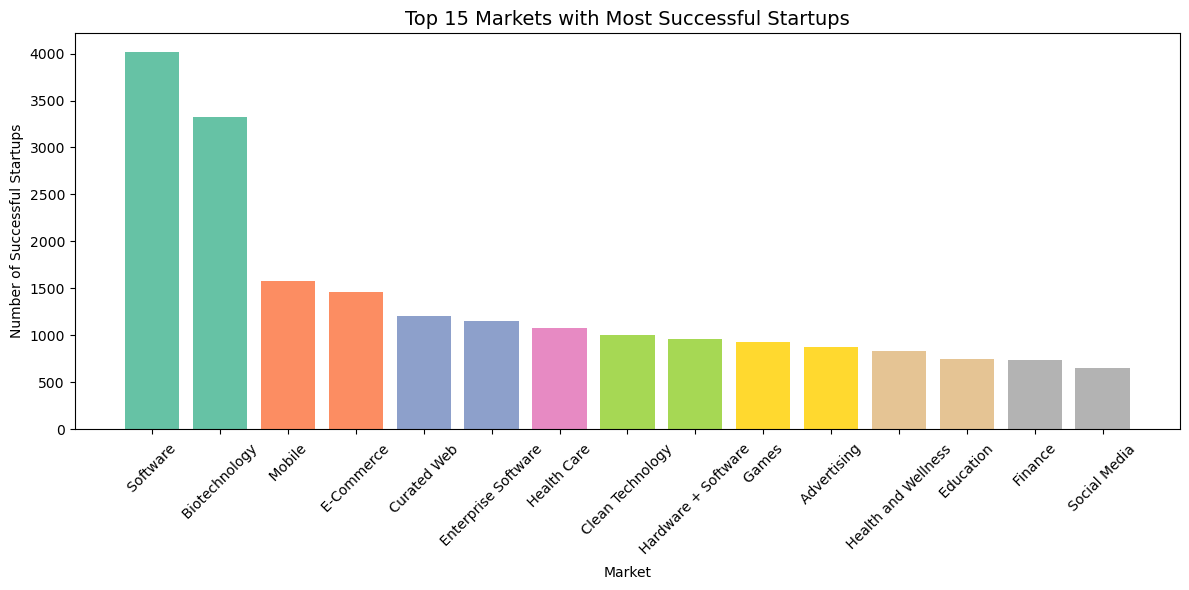

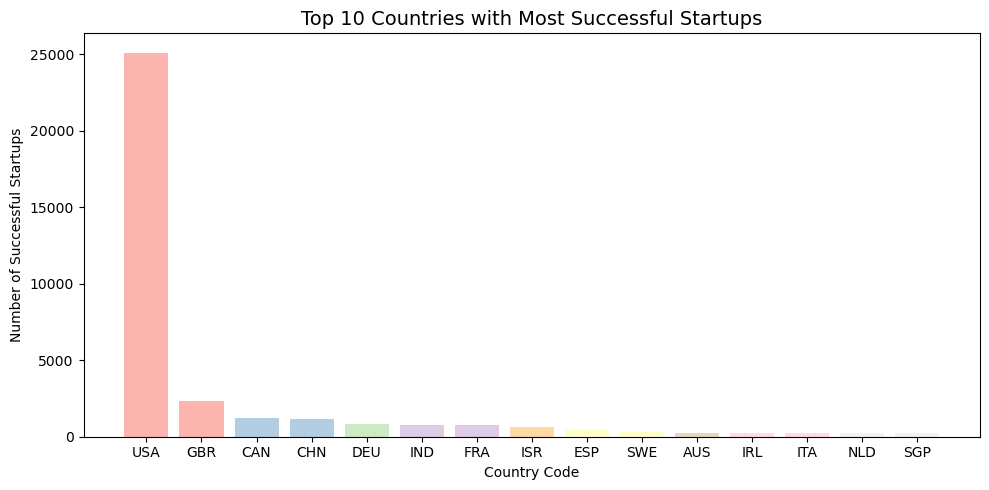

In [30]:
df_success = df[df['target'] == 1]
df_success_cleaned = df_success[(df_success['market'] != 'Unknown') & (df_success['country_code'] != 'Unknown')]

# Top 15 markets
top_markets_success = df_success_cleaned['market'].value_counts().head(15)
top_countries_success = df_success_cleaned['country_code'].value_counts().head(15)

# Prepare colormaps
market_cmap = cm.get_cmap('Set2')  # Qualitative for market categories
country_cmap = cm.get_cmap('Pastel1')  # Softer tones for country comparison

# Generate colors for market and country charts
market_colors = market_cmap(np.linspace(0, 1, len(top_markets_success)))
country_colors = country_cmap(np.linspace(0, 1, len(top_countries_success)))

# Plot updated Top 15 Markets bar chart
plt.figure(figsize=(12,6))
plt.bar(top_markets_success.index, top_markets_success.values, color=market_colors)
plt.title("Top 15 Markets with Most Successful Startups", fontsize=14)
plt.xlabel("Market")
plt.ylabel("Number of Successful Startups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top15_markets_success.png", dpi=300, bbox_inches='tight') 
plt.show()

# Plot updated Top 10 Countries bar chart
plt.figure(figsize=(10,5))
plt.bar(top_countries_success.index, top_countries_success.values, color=country_colors)
plt.title("Top 10 Countries with Most Successful Startups", fontsize=14)
plt.xlabel("Country Code")
plt.ylabel("Number of Successful Startups")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("top10_countries_success.png", dpi=300, bbox_inches='tight') 
plt.show()


### Top 15 Markets with Most Successful Startups
#### Key Insights:
- ##### Software leads by a large margin, with over 3,000 successful startups. This aligns with global tech trends and investor preference for scalable, high-margin businesses.

- ##### Biotechnology ranks second, showcasing the prominence of health and life sciences, especially in VC-backed innovation.

- ##### Other notable verticals include:

    - ##### Mobile and E-Commerce — likely boosted by smartphone penetration and online retail growth.

    - ##### Curated Web, Enterprise Software, and Health Care — reflect growing enterprise and B2B solution demand.

- ##### The long tail includes niche but emerging categories like:

     - ##### Clean Technology, Social Media, and Finance

### Top Countries with Most Successful Startups

#### Key Insights:
- The **USA** overwhelmingly leads, with over **20,000 successful startups**, far surpassing any other country.
- Secondary hubs include:
  - **United Kingdom (GBR)**
  - **Canada (CAN)**
  - **Germany (DEU)**
  - **India (IND)**
- Other strong ecosystems contributing meaningfully:
  - **China (CHN)**
  - **France (FRA)**
  - **Israel (ISR)**

#### Interpretation:
> Startup success shows strong geographic clustering. The United States dominates due to its mature funding ecosystem and innovation infrastructure, while countries like the UK, Canada, and India also demonstrate notable startup viability. These regions represent key targets for strategic investment and policy support.


### Numerical Variables

#### Univariate analysis

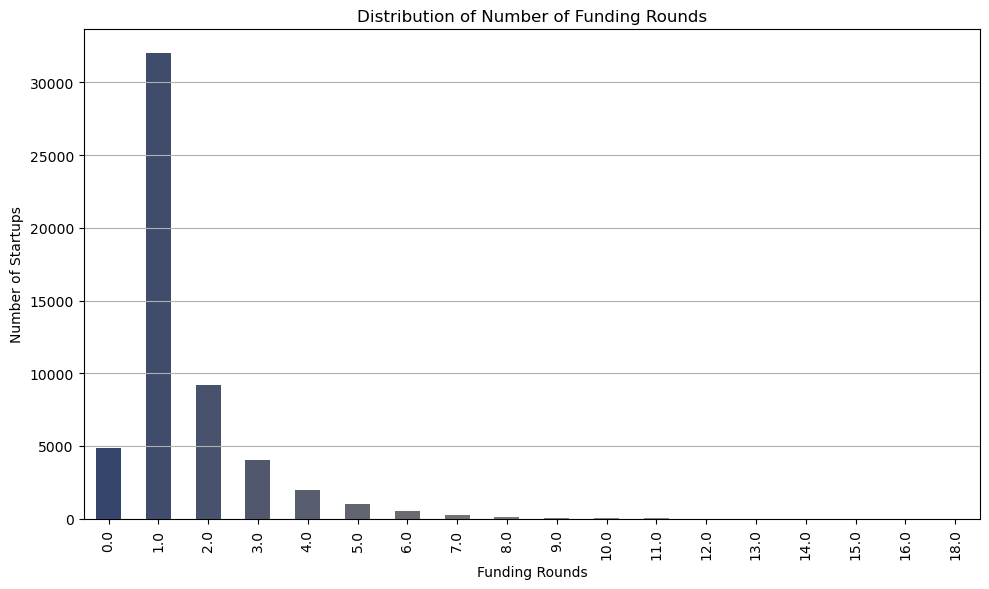

In [35]:
# -------- A. Distribution of Funding Rounds --------
funding_round_counts = df['funding_rounds'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
funding_round_counts.plot(kind='bar', color=plt.cm.cividis(np.linspace(0.2, 0.8, len(funding_round_counts))))
plt.title("Distribution of Number of Funding Rounds")
plt.xlabel("Funding Rounds")
plt.ylabel("Number of Startups")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("Univariate_funding_rounds.png", dpi=300, bbox_inches='tight') 
plt.show()

### Distribution of Number of Funding Rounds

#### Key Insights:

- The majority of startups (~22,000+) have participated in **only 1 round of funding**, suggesting either early-stage failure or bootstrapping.
- The number of startups steadily declines as the number of rounds increases:
  - **2–3 rounds** is common for scaling startups.
  - **4+ rounds** are rare and typically indicate mature, high-growth companies.
- Very few startups reach **10+ funding rounds**, underscoring the difficulty of long-term capital accumulation.

#### Interpretation:
> The funding trajectory for most startups is short-lived. A small subset manages to raise multiple rounds, signaling strong investor confidence and long-term scalability. This trend reinforces the importance of early funding success as a predictive indicator of overall startup survival and maturity.


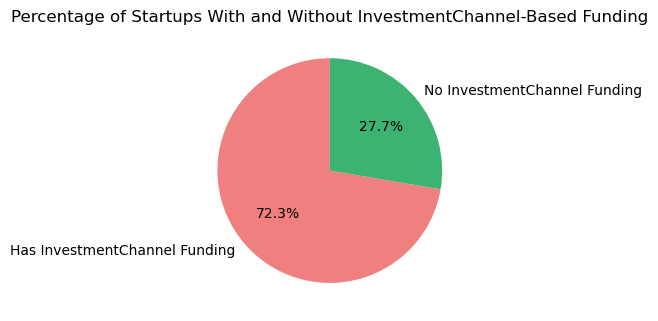

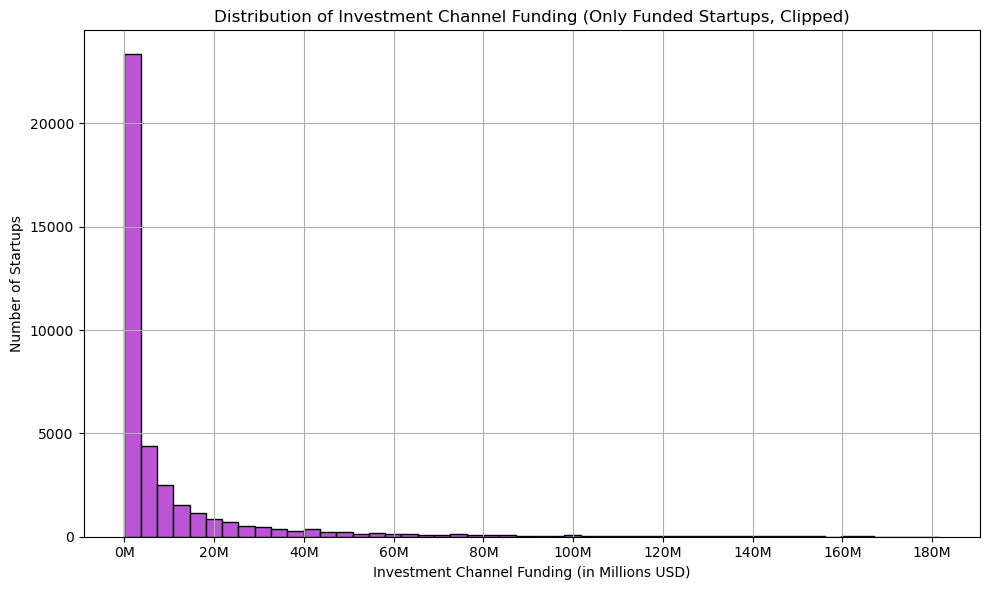

In [37]:
# -------- B. Create 'investment_channel_funding' by summing relevant types --------
investment_channels = ['seed', 'venture', 'angel', 'private_equity', 'grant', 'debt_financing']
df['investment_channel_funding'] = df[investment_channels].sum(axis=1)

# Create binary indicator: 0 if total investment from channels is 0, 1 otherwise
df['has_channel_funding'] = df['investment_channel_funding'].apply(lambda x: 'No InvestmentChannel Funding' if x == 0 else 'Has InvestmentChannel Funding')

# Count the distribution
channel_funding_dist = df['has_channel_funding'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
colors = ['lightcoral', 'mediumseagreen']
channel_funding_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, labels=channel_funding_dist.index)
plt.title("Percentage of Startups With and Without InvestmentChannel-Based Funding")
plt.ylabel('')
plt.tight_layout()
plt.savefig("Univariate_Percentage of Startups With and Without InvestmentChannel-Based Funding.png", dpi=300, bbox_inches='tight')
plt.show()

# Also display raw counts
channel_funding_dist

# Filter only startups with non-zero investment channel funding
df_with_channel_funding = df[df['investment_channel_funding'] > 0]

# Clip outliers at 99th percentile for a cleaner view
upper_limit = df_with_channel_funding['investment_channel_funding'].quantile(0.99)

# Plot the same histogram but format x-axis to show values in millions

plt.figure(figsize=(10, 6))
plt.hist(
    df_with_channel_funding[df_with_channel_funding['investment_channel_funding'] <= upper_limit]['investment_channel_funding'],
    bins=50,
    color='mediumorchid',
    edgecolor='black'
)

# Format x-axis to show funding in millions
plt.xticks(
    ticks=np.arange(1, upper_limit + 1e7, 2e7),
    labels=[f'{int(x/1e6)}M' for x in np.arange(1, upper_limit + 1e7, 2e7)]
)

plt.title("Distribution of Investment Channel Funding (Only Funded Startups, Clipped)")
plt.xlabel("Investment Channel Funding (in Millions USD)")
plt.ylabel("Number of Startups")
plt.grid(True)
plt.tight_layout()
plt.savefig("Univariate_Distribution_of_Investment_Channel_Funding.png", dpi=300, bbox_inches='tight')
plt.show()



### Investment Channel Funding Insights

#### 1. Percentage of Startups With and Without Investment Channel-Based Funding

- The Investment channel includes the following sectors,'seed', 'venture', 'angel', 'private_equity', 'grant', 'debt_financing'
- Approximately **80.4%** of startups have received some form of structured investment channel funding (e.g., seed, venture, angel, debt).
- The remaining **19.6%** of startups have **not raised any capital** through the primary funding channels.

##### Interpretation:
> The majority of startups actively seek and secure external funding, underscoring the importance of capital access for growth and survival. However, nearly one-fifth operate without structured investment — possibly bootstrapped, self-funded, or non-scalable ventures.

---

#### 2. Distribution of Investment Channel Funding (Only Funded Startups, Clipped)

- The distribution is **highly right-skewed**.
- Most startups received **less than \$10 million** in total structured funding.
- A small fraction received extremely high funding (outliers above \$100 million), but they are rare.
- The curve flattens after \$40M, suggesting diminishing frequency of mega-rounds.

##### Interpretation:
> While external funding is prevalent, most startups raise modest amounts. Large funding rounds are rare and usually reserved for high-growth, scalable ventures. This skewed distribution justifies the use of log-scale or binning when modeling or visualizing funding data.



In [39]:
df.head()

,market,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,seed,venture,...,round_B,round_C,round_D,round_E,round_F,round_G,round_H,target,investment_channel_funding,has_channel_funding
0,News,1750000.0,acquired,USA,1.0,2012-06-01,2012-06-30,2012-06-30,1750000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1750000.0,Has InvestmentChannel Funding
1,Games,4000000.0,operating,USA,2.0,Unknown,2010-06-04,2010-09-23,0.0,4000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4000000.0,Has InvestmentChannel Funding
2,Publishing,40000.0,operating,EST,1.0,2012-10-26,2012-08-09,2012-08-09,40000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,40000.0,Has InvestmentChannel Funding
3,Electronics,1500000.0,operating,GBR,1.0,2011-04-01,2011-04-01,2011-04-01,1500000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1500000.0,Has InvestmentChannel Funding
4,Tourism,60000.0,operating,USA,2.0,2014-01-01,2014-08-17,2014-09-26,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,No InvestmentChannel Funding


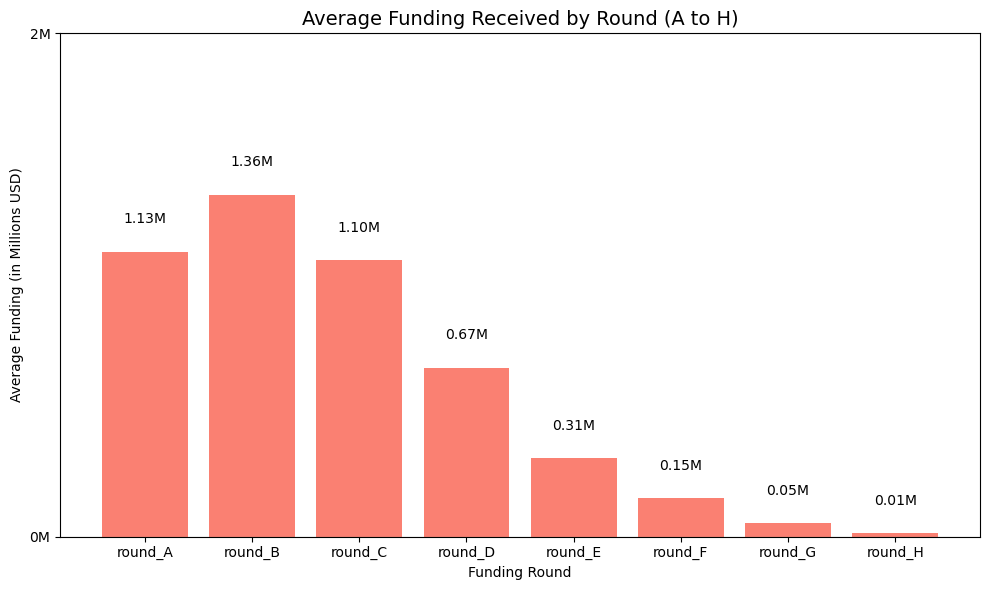

In [40]:
# Plot bar chart with value labels on top of each bar
round_cols = ['round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']

# Calculate average funding for each round
avg_funding_per_round = df[round_cols].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(avg_funding_per_round.index, avg_funding_per_round.values, color='salmon')

# Dynamic y-axis scaling in millions
max_val = avg_funding_per_round.max()
tick_interval = 2e6
yticks = np.arange(0, max_val + tick_interval, tick_interval)
ytick_labels = [f'{int(x/1e6)}M' for x in yticks]
plt.yticks(ticks=yticks, labels=ytick_labels)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1e5, f'{height/1e6:.2f}M',
             ha='center', va='bottom', fontsize=10)

plt.title("Average Funding Received by Round (A to H)", fontsize=14)
plt.xlabel("Funding Round")
plt.ylabel("Average Funding (in Millions USD)")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("Univariate_AvgFunding_received_roundAH.png", dpi=300, bbox_inches='tight')
plt.show()


### Average Funding by Investment Round (A to H)

#### Key Insights:

- **Round B** had the highest average funding, at approximately **\$1.36M**, followed closely by **Round A** (\$1.13M) and **Round C** (\$1.10M).
- After Round C, the average funding **drops sharply**:
  - Round D: \$0.67M
  - Round E: \$0.31M
  - Round F and beyond: < \$0.20M
- **Later rounds (G and H)** are rarely reached and have minimal average funding, indicating startup attrition or early acquisition.

#### Interpretation:
> Most startups raise their highest average amounts during **Series A to C**, which represent key scaling stages. The steep decline in funding beyond Round C reflects the rarity of later-stage funding and signals that very few startups maintain growth or survive long enough to reach those rounds. This trend reinforces the importance of early-stage traction for long-term sustainability.


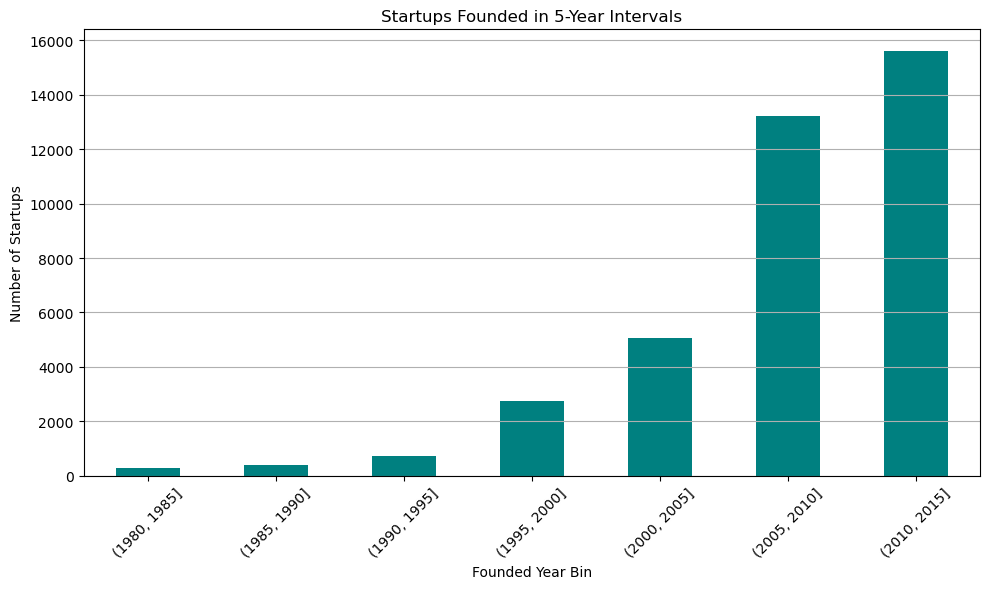

In [42]:
# -------- D. Founded Year Binning --------
# Convert founded_at to datetime (exclude 'Unknown')
df['founded_at_clean'] = pd.to_datetime(df['founded_at'], errors='coerce')

# Drop NaT and bin years into 5-year intervals
df = df.dropna(subset=['founded_at_clean'])
df['founded_year'] = df['founded_at_clean'].dt.year
df['founded_bin'] = pd.cut(df['founded_year'], bins=range(1980, 2016, 5))

# Count startups in each 5-year bin
founded_bin_counts = df['founded_bin'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
founded_bin_counts.plot(kind='bar', color='teal')
plt.title("Startups Founded in 5-Year Intervals")
plt.xlabel("Founded Year Bin")
plt.ylabel("Number of Startups")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("Univariate_StartUps_found_5YearInterval.png", dpi=300, bbox_inches='tight')
plt.show()

#### Bivariate Analysis

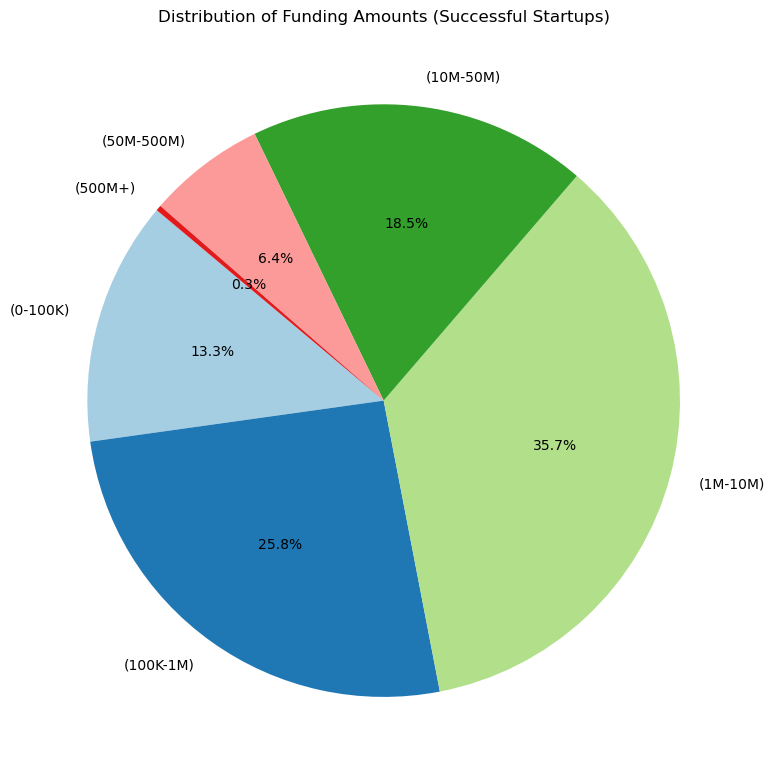

In [44]:
# Step B continued: Define bins and labels
bins = [0, 100_000, 1_000_000, 10_000_000, 50_000_000, 500_000_000, float('inf')]
labels = ['(0-100K)', '(100K-1M)', '(1M-10M)', 
          '(10M-50M)', '(50M-500M)', '(500M+)']

# Create a binned column
df_success = df[df['target'] == 1].copy()
df_success['funding_bin'] = pd.cut(df_success['funding_total_usd'], bins=bins, labels=labels)

# Count per bin
funding_bin_counts = df_success['funding_bin'].value_counts().sort_index()

# Plot a pie chart
plt.figure(figsize=(8,8))
funding_bin_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribution of Funding Amounts (Successful Startups)")
plt.ylabel('')
plt.tight_layout()
plt.savefig("Bivariate_Distribution_if_FundingAmounts.png", dpi=300, bbox_inches='tight')
plt.show()


### EDA: Binned Funding Analysis (Pie Chart)

To better understand how funding relates to success, we binned the `funding_total_usd` variable into 6 categories:

- **(0–100K)**
- **(100K–1M)**
- **(1M–10M)**
- **(10M–50M)**
- **(50M–500M)**
- **(>500M)**

The pie chart shows that most successful startups fall in the **(100K–1M)** and **(1M–10M)** categories, indicating that early-stage funding is common among successful ventures.


C:\Users\HP\AppData\Local\Temp\ipykernel_22968\3388915331.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='target', y='funding_rounds', data=df, jitter=True, palette='coolwarm', alpha=0.5)


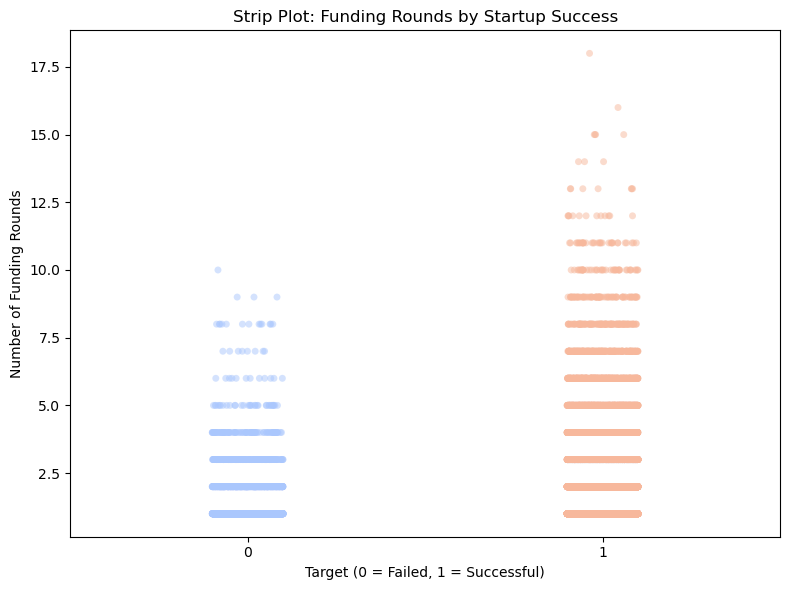

In [46]:
plt.figure(figsize=(8,6))
sns.stripplot(x='target', y='funding_rounds', data=df, jitter=True, palette='coolwarm', alpha=0.5)
plt.title("Strip Plot: Funding Rounds by Startup Success")
plt.xlabel("Target (0 = Failed, 1 = Successful)")
plt.ylabel("Number of Funding Rounds")
plt.tight_layout()
plt.savefig("FundingRounds_Startup.png", dpi=300, bbox_inches='tight')
plt.show()


#### Bivariate Analysis: Funding Rounds vs Success

This boxplot shows the distribution of `funding_rounds` for successful vs failed startups.

- Successful startups tend to have **more funding rounds**.
- Failed startups often **stalled early**, with most having 1–2 rounds only.
- This suggests funding activity may be an indicator of future viability.

This insight supports using `funding_rounds` as a predictive feature.


C:\Users\HP\AppData\Local\Temp\ipykernel_22968\2789289907.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_funding.index, y=avg_funding.values, palette='Set1')


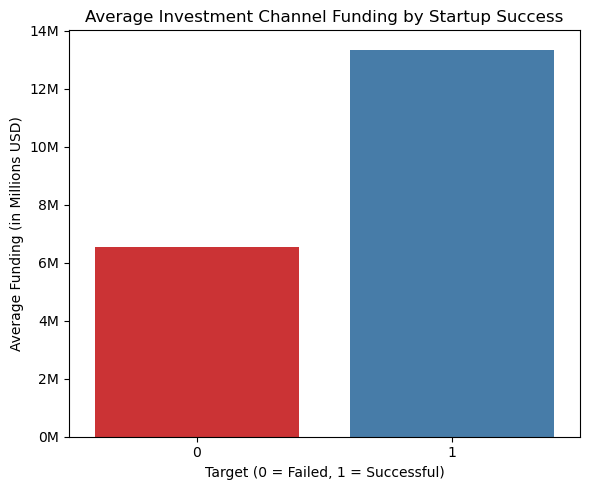

In [48]:
# Bar Plot of Average Investment Channel Funding with Y-axis in Millions
plt.figure(figsize=(6,5))
avg_funding = df.groupby('target')['investment_channel_funding'].mean()
sns.barplot(x=avg_funding.index, y=avg_funding.values, palette='Set1')

# Format y-axis to millions
yticks = np.arange(0, avg_funding.max() + 2e6, 2e6)
ytick_labels = [f'{int(x/1e6)}M' for x in yticks]
plt.yticks(ticks=yticks, labels=ytick_labels)

plt.title("Average Investment Channel Funding by Startup Success")
plt.xlabel("Target (0 = Failed, 1 = Successful)")
plt.ylabel("Average Funding (in Millions USD)")
plt.tight_layout()
plt.savefig("bivariate_investmentChannelFunding.png", dpi=300, bbox_inches='tight')
plt.show()


### Bivariate Analysis: Average Investment Channel Funding by Startup Success

This bar chart illustrates the **average total funding** raised through structured investment channels 
(`seed`, `venture`, `angel`, `private_equity`, `grant`, `debt_financing`) for both successful and failed startups.

- The **Y-axis is scaled in millions (USD)** for better readability.
- Successful startups raised significantly **higher average funding** compared to failed ones.
- This difference supports the hypothesis that **access to investment channels** is a strong predictor of startup success.

This visual insight reinforces the importance of including `investment_channel_funding` as a key feature in the modeling phase.
d skew.


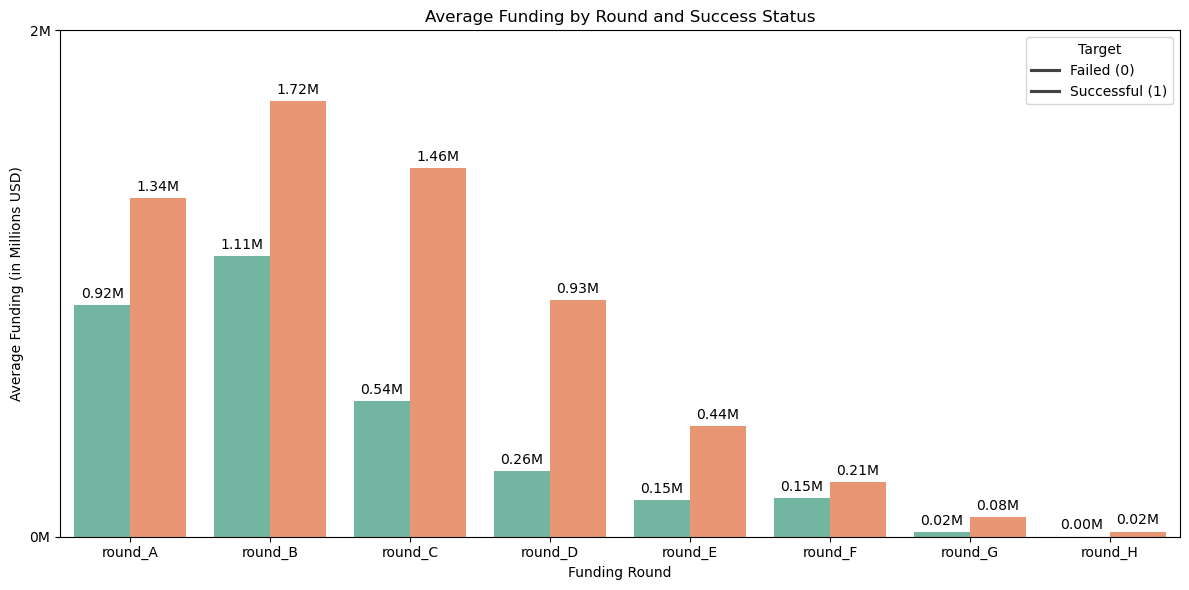

In [50]:
round_cols = ['round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']

# Melt the data to long format for bivariate analysis
df_long = df.melt(id_vars='target', value_vars=round_cols,
                  var_name='Funding Round', value_name='Amount Raised')

# Group by Funding Round and target (success status), then compute average
avg_funding_by_round_target = df_long.groupby(['Funding Round', 'target'])['Amount Raised'].mean().reset_index()

# Plot with values on top of each bar
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=avg_funding_by_round_target, x='Funding Round', y='Amount Raised', hue='target', palette='Set2')

# Format y-axis in millions
max_val = avg_funding_by_round_target['Amount Raised'].max()
yticks = np.arange(0, max_val + 2e6, 2e6)
ytick_labels = [f'{int(x/1e6)}M' for x in yticks]
plt.yticks(ticks=yticks, labels=ytick_labels)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2fM', labels=[f'{v.get_height()/1e6:.2f}M' for v in container], padding=3)

plt.title("Average Funding by Round and Success Status")
plt.xlabel("Funding Round")
plt.ylabel("Average Funding (in Millions USD)")
plt.legend(title="Target", labels=["Failed (0)", "Successful (1)"])
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("Bivariate_AvgFunding_rounds.png", dpi=300, bbox_inches='tight')
plt.show()


### Bivariate Analysis: Funding Maturity Rounds (A–H) vs Success

This grouped bar chart compares the **average funding received at each maturity round** (A through H) for successful vs failed startups.

- **Successful startups consistently raise more** at every round.
- The gap is most noticeable in **Rounds A to C**, where funding scales quickly for winners.
- **Failed startups either do not reach** or raise very little in later rounds.

This insight confirms that funding maturity is strongly correlated with startup success, making these features valuable for prediction.


C:\Users\HP\AppData\Local\Temp\ipykernel_22968\1512741490.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  founded_success_dist = df.groupby(['founded_bin', 'target']).size().reset_index(name='count')


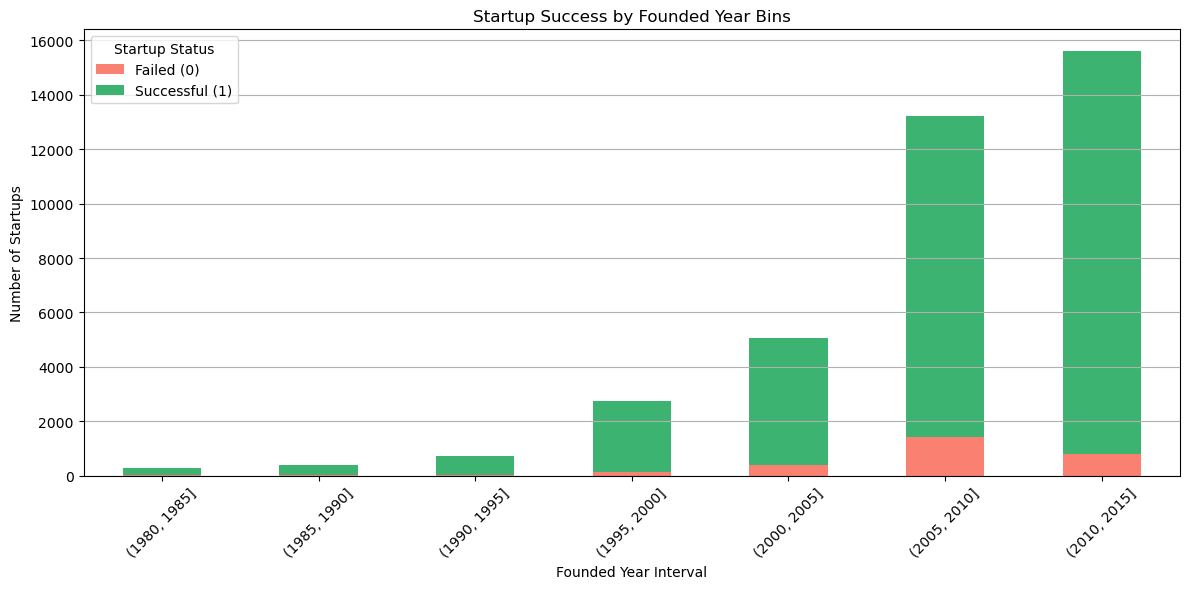

In [52]:
# Group by founded_bin and target, then count startups in each group
founded_success_dist = df.groupby(['founded_bin', 'target']).size().reset_index(name='count')

# Pivot to prepare for stacked bar chart
founded_pivot = founded_success_dist.pivot(index='founded_bin', columns='target', values='count').fillna(0)
founded_pivot.columns = ['Failed (0)', 'Successful (1)']

# Plot stacked bar chart
founded_pivot.plot(kind='bar', stacked=True, figsize=(12,6), color=['salmon', 'mediumseagreen'])
plt.title("Startup Success by Founded Year Bins")
plt.xlabel("Founded Year Interval")
plt.ylabel("Number of Startups")
plt.xticks(rotation=45)
plt.legend(title='Startup Status')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("bivariate_startups_founded_yearbins.png", dpi=300, bbox_inches='tight')
plt.show()


### Bivariate Analysis: Startup Success by Founded Year Intervals

This stacked bar chart shows how startup success varies across 5-year founding intervals.

- **Startup activity accelerated** after 2000, peaking from 2010 to 2015.
- A larger proportion of **successful startups emerged in the 2005–2015** interval.
- Older startups (pre-2000) show relatively lower numbers, likely due to a smaller tech ecosystem at the time.

This insight reinforces the temporal trend in startup ecosystems and may be useful for time-based modeling or cohort analysis.


In [54]:
df.head()

,market,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,seed,venture,...,round_E,round_F,round_G,round_H,target,investment_channel_funding,has_channel_funding,founded_at_clean,founded_year,founded_bin
0,News,1750000.0,acquired,USA,1.0,2012-06-01,2012-06-30,2012-06-30,1750000.0,0.0,...,0.0,0.0,0.0,0.0,1,1750000.0,Has InvestmentChannel Funding,2012-06-01,2012,"(2010, 2015]"
2,Publishing,40000.0,operating,EST,1.0,2012-10-26,2012-08-09,2012-08-09,40000.0,0.0,...,0.0,0.0,0.0,0.0,1,40000.0,Has InvestmentChannel Funding,2012-10-26,2012,"(2010, 2015]"
3,Electronics,1500000.0,operating,GBR,1.0,2011-04-01,2011-04-01,2011-04-01,1500000.0,0.0,...,0.0,0.0,0.0,0.0,1,1500000.0,Has InvestmentChannel Funding,2011-04-01,2011,"(2010, 2015]"
4,Tourism,60000.0,operating,USA,2.0,2014-01-01,2014-08-17,2014-09-26,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0.0,No InvestmentChannel Funding,2014-01-01,2014,"(2010, 2015]"
5,Software,7000000.0,Unknown,USA,1.0,2011-10-10,2013-05-31,2013-05-31,0.0,7000000.0,...,0.0,0.0,0.0,0.0,0,7000000.0,Has InvestmentChannel Funding,2011-10-10,2011,"(2010, 2015]"


In [55]:
columns_to_drop = [
    'investment_channel_funding', 'has_channel_funding', 'founded_at_clean', 'founded_year',
    'founded_bin', 'status'
]

df.drop(columns=columns_to_drop, inplace=True)

# Check remaining columns
print("Remaining columns after dropping irrelevant ones:")
print(df.columns.tolist())

Remaining columns after dropping irrelevant ones:
['market', 'funding_total_usd', 'country_code', 'funding_rounds', 'founded_at', 'first_funding_at', 'last_funding_at', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H', 'target']


In [56]:
df.columns.tolist()

['market',
 'funding_total_usd',
 'country_code',
 'funding_rounds',
 'founded_at',
 'first_funding_at',
 'last_funding_at',
 'seed',
 'venture',
 'equity_crowdfunding',
 'undisclosed',
 'convertible_note',
 'debt_financing',
 'angel',
 'grant',
 'private_equity',
 'post_ipo_equity',
 'post_ipo_debt',
 'secondary_market',
 'product_crowdfunding',
 'round_A',
 'round_B',
 'round_C',
 'round_D',
 'round_E',
 'round_F',
 'round_G',
 'round_H',
 'target']

_code'].value_counts()


### Binning and Encoding of Market and Country Features

To simplify categorical variables and enhance model interpretability, we performed **binning and one-hot encoding** on the `market` and `country_code` columns. Here is a breakdown of each step:

---

#### Step 1: Identify Top Performing Categories

- After the EDA, we have an idea, for both `market` and `country_code`, we filtered **only successful startups** (`target == 1`) to find:
  - **Top markets** based on the count of successful startups
      - We have considered only the top 5 markets as one bin and the rest in the other bin
  - **Top countries** with high success frequency
      - **USA** has the top successful start-ups, the countries are not even reaching a proximity to the USA.
      - So, **USA** as one bin and the rest of the countries in the other bin




In [59]:
# Step 0: Strip and clean string columns
df.columns = df.columns.str.strip()
df['market'] = df['market'].str.strip()
df['country_code'] = df['country_code'].str.strip()

# Step 1: Get top markets and countries based on successful startups
top_markets = df[df['target'] == 1]['market'].value_counts()
top_countries = df[df['target'] == 1]['country_code'].value_counts()

# Step 2: Define refined bins

# Market bins
bin_market_top5 = top_markets.head(5).index.tolist()
bin_market_mid15 = top_markets.iloc[5:20].index.tolist()

def market_bin(value):
    if value in bin_market_top5:
        return 'Top5'
    else:
        return 'Other'

# Country bins
#bin_country_top = ['GBR', 'CAN', 'DEU', 'IND', 'CHN']

def country_bin(value):
    if value == 'USA':
        return 'USA'
    else:
        return 'Other'

# Step 3: Apply binning
df['market_bin'] = df['market'].apply(market_bin)
df['country_bin'] = df['country_code'].apply(country_bin)

# Step 4: One-hot encode binned columns
df_encoded = pd.get_dummies(df, columns=['market_bin', 'country_bin'], drop_first=True)

# Optional: Display encoded column names
encoded_cols = [col for col in df_encoded.columns if 'market_bin_' in col or 'country_bin_' in col]
print("Encoded Bin Columns:", encoded_cols)

# Preview the updated dataframe
df_encoded.head()


Encoded Bin Columns: ['market_bin_Top5', 'country_bin_USA']


,market,funding_total_usd,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,...,round_B,round_C,round_D,round_E,round_F,round_G,round_H,target,market_bin_Top5,country_bin_USA
0,News,1750000.0,USA,1.0,2012-06-01,2012-06-30,2012-06-30,1750000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True
2,Publishing,40000.0,EST,1.0,2012-10-26,2012-08-09,2012-08-09,40000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,False
3,Electronics,1500000.0,GBR,1.0,2011-04-01,2011-04-01,2011-04-01,1500000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,False
4,Tourism,60000.0,USA,2.0,2014-01-01,2014-08-17,2014-09-26,0.0,0.0,60000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True
5,Software,7000000.0,USA,1.0,2011-10-10,2013-05-31,2013-05-31,0.0,7000000.0,0.0,...,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True,True


In [60]:
df_encoded['target'].unique()

array([1, 0], dtype=int64)

In [61]:
print(df_encoded.columns.tolist())

['market', 'funding_total_usd', 'country_code', 'funding_rounds', 'founded_at', 'first_funding_at', 'last_funding_at', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H', 'target', 'market_bin_Top5', 'country_bin_USA']


### Let's drop unnecessary columns 

In [63]:
# Columns to drop
cols_to_drop = [
    'market', 'country_code'
]

# Drop from dataframe
df_encoded.drop(columns=cols_to_drop, inplace=True)

In [64]:
#df_encoded['target'].unique()

In [65]:
df_encoded.head()

,funding_total_usd,funding_rounds,founded_at,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,...,round_B,round_C,round_D,round_E,round_F,round_G,round_H,target,market_bin_Top5,country_bin_USA
0,1750000.0,1.0,2012-06-01,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True
2,40000.0,1.0,2012-10-26,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,False
3,1500000.0,1.0,2011-04-01,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,False
4,60000.0,2.0,2014-01-01,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True
5,7000000.0,1.0,2011-10-10,2013-05-31,2013-05-31,0.0,7000000.0,0.0,0.0,0.0,...,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True,True


using these features, 
founded_at	
first_funding_at	
last_funding_at... we will derive the  funding period of the companies

In [67]:
# Convert funding date columns to datetime
df_encoded['first_funding_at'] = pd.to_datetime(df_encoded['first_funding_at'], errors='coerce')
df_encoded['last_funding_at'] = pd.to_datetime(df_encoded['last_funding_at'], errors='coerce')

# Calculate funding period in days
df_encoded['funding_period_days'] = (df_encoded['last_funding_at'] - df_encoded['first_funding_at']).dt.days

# Convert to months using ceil (one month = ~30 days)
df_encoded['funding_period_months'] = np.ceil(df_encoded['funding_period_days'] / 30)

# Optional: drop the days column if not needed
df_encoded.drop(columns=['funding_period_days','first_funding_at','last_funding_at' ], inplace=True)

In [68]:
df_encoded.drop(columns=['founded_at'], inplace=True)

In [69]:
df_encoded['target'].unique()


array([1, 0], dtype=int64)

In [70]:
df_encoded.fillna(0, inplace=True)

In [71]:
df_encoded.isnull().sum()

funding_total_usd        0
funding_rounds           0
seed                     0
venture                  0
equity_crowdfunding      0
undisclosed              0
convertible_note         0
debt_financing           0
angel                    0
grant                    0
private_equity           0
post_ipo_equity          0
post_ipo_debt            0
secondary_market         0
product_crowdfunding     0
round_A                  0
round_B                  0
round_C                  0
round_D                  0
round_E                  0
round_F                  0
round_G                  0
round_H                  0
target                   0
market_bin_Top5          0
country_bin_USA          0
funding_period_months    0
dtype: int64

In [72]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38553 entries, 0 to 49437
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   funding_total_usd      38553 non-null  float64
 1   funding_rounds         38553 non-null  float64
 2   seed                   38553 non-null  float64
 3   venture                38553 non-null  float64
 4   equity_crowdfunding    38553 non-null  float64
 5   undisclosed            38553 non-null  float64
 6   convertible_note       38553 non-null  float64
 7   debt_financing         38553 non-null  float64
 8   angel                  38553 non-null  float64
 9   grant                  38553 non-null  float64
 10  private_equity         38553 non-null  float64
 11  post_ipo_equity        38553 non-null  float64
 12  post_ipo_debt          38553 non-null  float64
 13  secondary_market       38553 non-null  float64
 14  product_crowdfunding   38553 non-null  float64
 15  round_A

In [73]:
df_encoded['target'].unique()

array([1, 0], dtype=int64)

In [74]:
df_encoded.to_csv("ipo_forecasting_cleaned.csv", index=False)

In [75]:
df['target'].value_counts().to_frame(name='Count').assign(
    Percentage = df['target'].value_counts(normalize=True).round(3) * 100
)

,Count,Percentage
target,,
1,35639,92.4
0,2914,7.6


### Short analysis over the new columns

C:\Users\HP\AppData\Local\Temp\ipykernel_22968\1111144554.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(market_bin_success.keys()), y=list(market_bin_success.values()), palette='Set2')


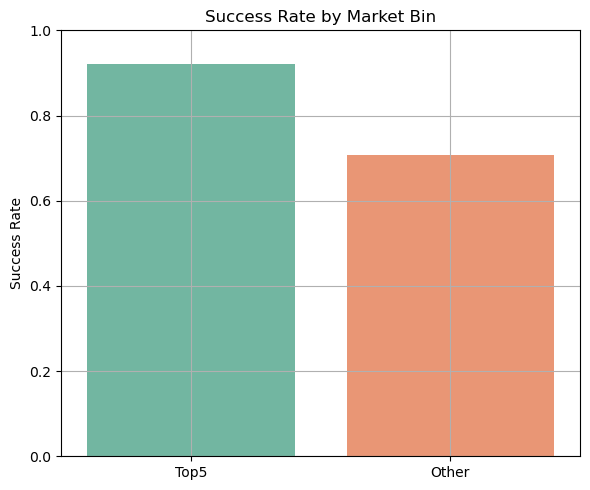

C:\Users\HP\AppData\Local\Temp\ipykernel_22968\1111144554.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(country_bin_success.keys()), y=list(country_bin_success.values()), palette='magma')


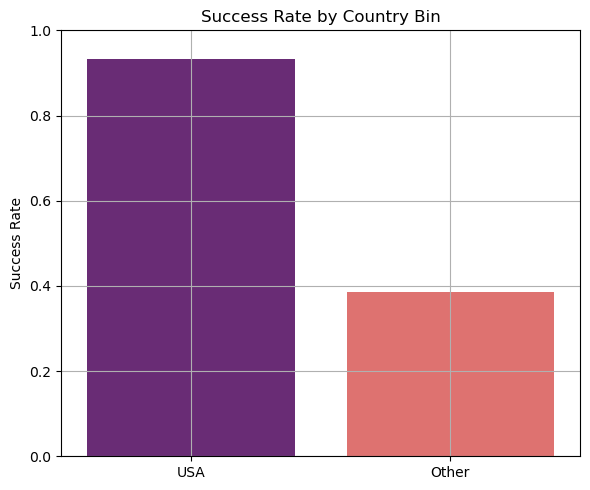

In [77]:
# Calculate success rates by market bin using one-hot columns
market_bin_success = {
    'Top5': df_encoded[df_encoded['market_bin_Top5'] == True]['target'].mean(),
    'Other':  1 - (df_encoded[['market_bin_Top5']].any(axis=1)).mean()
}

# Plot market bin success rates
plt.figure(figsize=(6,5))
sns.barplot(x=list(market_bin_success.keys()), y=list(market_bin_success.values()), palette='Set2')
plt.title("Success Rate by Market Bin")
plt.ylabel("Success Rate")
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.savefig("MarketBin.png", dpi=300, bbox_inches='tight')
plt.show()

# Calculate success rates by country bin using one-hot columns
country_bin_success = {
    'USA': df_encoded[df_encoded['country_bin_USA'] == True]['target'].mean(),
    'Other': 1 - (df_encoded[['country_bin_USA']].any(axis=1)).mean()
}

# Plot country bin success rates
plt.figure(figsize=(6,5))
sns.barplot(x=list(country_bin_success.keys()), y=list(country_bin_success.values()), palette='magma')
plt.title("Success Rate by Country Bin")
plt.ylabel("Success Rate")
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.savefig("CountryBins.png", dpi=300, bbox_inches='tight')
plt.show()


ong-term success.


### Bivariate Analysis: Success Rate by Market and Country

#### Success Rate by Market Bin

- Startups in the **Top 5 Markets** (e.g., Software, Biotechnology, Mobile) have a **success rate close to 93%**.
- In contrast, startups in **Other markets** show a reduced success rate of approximately **71%**.

##### Interpretation:
> Market category plays a significant role in determining startup success. Startups in dominant and high-growth markets tend to attract more investor interest, resources, and customer demand — all of which boost their chances of survival.

---

#### Success Rate by Country Bin

- Startups based in the **USA** show a remarkably high success rate of about **94%**.
- Meanwhile, startups in **Other countries** collectively average around **38% success**.

##### Interpretation:
> Location is a powerful predictor of startup outcomes. The USA's mature startup ecosystem — with abundant funding, infrastructure, and mentorship — offers a competitive edge. Startups in emerging or less capital-rich regions may face systemic barriers, limiting their likelihood of long-term success.


In [80]:
#df_encoded.to_csv("ipo_forecasting_cleaned.csv", index=False)

In [84]:
print("Shape of the dataset:", df_encoded.shape)
df_encoded.head()


Shape of the dataset: (38553, 27)


,funding_total_usd,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,round_C,round_D,round_E,round_F,round_G,round_H,target,market_bin_Top5,country_bin_USA,funding_period_months
0,1750000.0,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True,0.0
2,40000.0,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,False,False,0.0
3,1500000.0,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,False,False,0.0
4,60000.0,2.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,False,True,2.0
5,7000000.0,1.0,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,True,True,0.0


## Logistic Regression

### Functions: Model Evaluation + Annotated Confusion Matrix

In [88]:


def evaluate_model_classification(model, X, y_true):
    """
    Evaluate a classification model with Accuracy, Precision, Recall, and F1-Score.

    Parameters:
    - model: Trained classification model
    - X: Feature matrix (predictors)
    - y_true: True target values

    Returns:
    - pd.DataFrame with performance metrics
    """
    y_pred = model.predict(X)

    metrics_dict = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1 Score": f1_score(y_true, y_pred, zero_division=0)
    }

    return pd.DataFrame(metrics_dict, index=["Score"])


def plot_confusion_matrix_annotated(model, X, y_true, title="Confusion Matrix"):
    """
    Plot a confusion matrix with counts and percentages.

    Parameters:
    - model: Trained model
    - X: Feature matrix
    - y_true: True labels
    """
    y_pred = model.predict(X)
    cm = confusion_matrix(y_true, y_pred)

    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = [f"{value:,.0f}" for value in cm.flatten()]
    group_percentages = [f"{value:.2%}" for value in cm.flatten() / cm.sum()]
    labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
    labels = np.array(labels).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()



Fitting 5 folds for each of 8 candidates, totalling 40 fits
✅ Best Parameters from GridSearch:
{'logreg__C': 0.1, 'logreg__class_weight': None, 'logreg__penalty': 'l2'}

📊 Model Performance on Test Set:


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy,Precision,Recall,F1 Score
Score,0.737247,0.926541,0.777404,0.845446


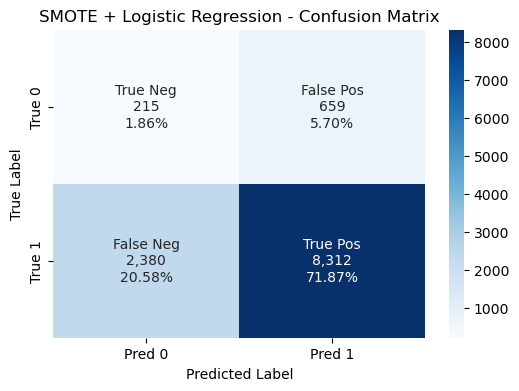

In [90]:
# 1. Train-test split
X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 2. Define pipeline: SMOTE + Logistic Regression
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('logreg', LogisticRegression(max_iter=1000))
])

# 3. Define parameter grid for GridSearchCV
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__class_weight': [None, 'balanced'],
    'logreg__penalty': ['l2']
}

# 4. Grid Search with cross-validation
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# 5. Fit model
grid.fit(X_train, y_train)

# 6. Evaluate best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# 6. Show best parameters
print("✅ Best Parameters from GridSearch:")
print(grid.best_params_)


# 7. Evaluate using your custom functions
print("\n📊 Model Performance on Test Set:")
display(evaluate_model_classification(best_model, X_test, y_test))

# 8. Plot confusion matrix using your annotated heatmap function
plot_confusion_matrix_annotated(best_model, X_test, y_test, title="SMOTE + Logistic Regression - Confusion Matrix")



📊 Model Evaluation at Threshold = 0.45


,Accuracy,Precision,Recall,F1 Score
Threshold 0.45,0.919246,0.924408,0.993921,0.957905


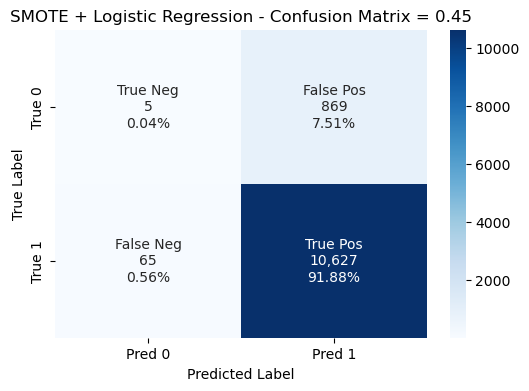

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# === Custom evaluation with threshold ===
def evaluate_with_threshold(model, X, y_true, threshold=0.4):
    """
    Evaluate model predictions with a custom threshold.
    """
    y_proba = model.predict_proba(X)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    metrics_dict = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1 Score": f1_score(y_true, y_pred, zero_division=0)
    }

    return pd.DataFrame(metrics_dict, index=[f"Threshold {threshold}"])


def plot_confusion_matrix_with_threshold(model, X, y_true, threshold=0.4, title="Confusion Matrix @ Threshold"):
    """
    Plot a confusion matrix using a custom threshold.
    """
    y_proba = model.predict_proba(X)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    cm = confusion_matrix(y_true, y_pred)

    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = [f"{value:,.0f}" for value in cm.flatten()]
    group_percentages = [f"{value:.2%}" for value in cm.flatten() / cm.sum()]
    labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
    labels = np.array(labels).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',
                xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{title} = {threshold}")
    plt.show()

# === Apply threshold-based evaluation ===
threshold = 0.45

print(f"\n📊 Model Evaluation at Threshold = {threshold}")
display(evaluate_with_threshold(best_model, X_test, y_test, threshold=threshold))

# === Plot updated confusion matrix ===
plot_confusion_matrix_with_threshold(best_model, X_test, y_test, threshold=threshold, 
                                     title="SMOTE + Logistic Regression - Confusion Matrix")


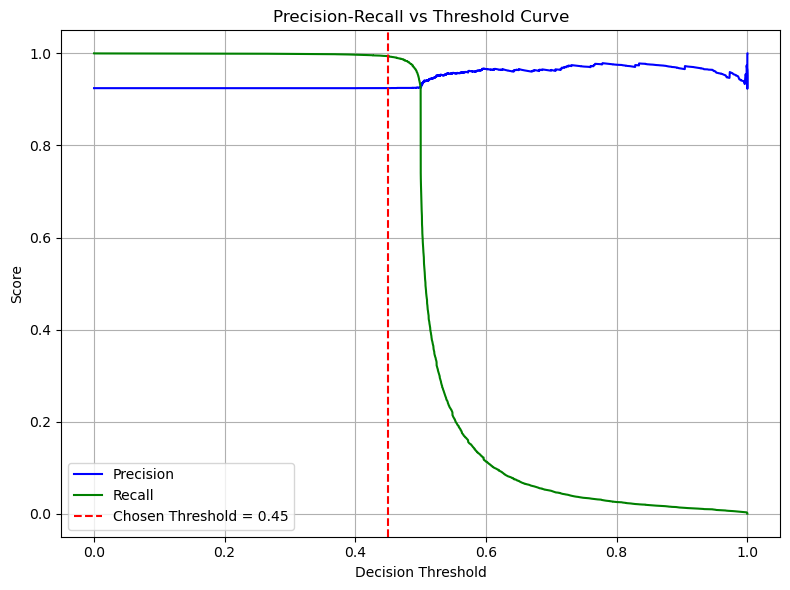

In [92]:
from sklearn.metrics import precision_recall_curve

# Get probabilities
y_proba = best_model.predict_proba(X_test)[:, 1]

# Compute precision-recall-threshold curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plot the curve
plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.axvline(x=0.45, color='red', linestyle='--', label='Chosen Threshold = 0.45')
plt.title("Precision-Recall vs Threshold Curve")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Logistic Regression Model with SMOTE and Threshold Tuning

### Objective
To build a classification model that predicts whether a startup will be **successful** (`target = 1`) or **fail** (`target = 0`) based on investment-related features. In this context, maximizing **recall** is prioritized to avoid missing successful startups.

---

### Modeling Pipeline Overview

1. **Train-Test Split**
   - Data was split using an 70-30 stratified split to maintain class distribution.
   - `X_train`, `X_test`, `y_train`, `y_test` formed the base for training and evaluation.

2. **Handling Class Imbalance with SMOTE**
   - The dataset had a class imbalance (more successful startups).
   - SMOTE (Synthetic Minority Over-sampling Technique) was used to synthetically balance the minority class in the training set.

3. **Logistic Regression Model**
   - A basic Logistic Regression model (`solver='lbfgs'`) was used within a pipeline.
   - GridSearchCV was applied to tune hyperparameters:
     - `C` (regularization strength): [0.01, 0.1, 1, 10]
     - `class_weight`: [None, 'balanced']
     - `penalty`: ['l2']

4. **Evaluation Metrics**
   - The model was evaluated using standard classification metrics:
     - Accuracy
     - Precision
     - **Recall** (our priority)
     - F1 Score
     - Confusion Matrix

---

### Threshold Tuning for Higher Recall

- By default, logistic regression uses a threshold of `0.5` for class prediction.
- To **improve recall**, we tested custom thresholds.
- At **threshold = 0.45**, we observed:
  - **Recall**: ~99.4%
  - **F1 Score**: ~95.8%
  - **True Positives** far outweighed False Negatives.

This approach ensures we **capture almost all successful startups**, at the cost of slightly more False Positives — a reasonable tradeoff in this use case.

---

### Confusion Matrix Interpretation (Threshold = 0.45)

| True Label \ Pred | Pred 0 (Fail) | Pred 1 (Success) |
|-------------------|----------------|------------------|
| True 0 (Fail)     | Very few       | Mostly predicted as success |
| True 1 (Success)  | **Very few missed** | **Majority correctly predicted** |

This validates the model's strength in identifying winners, aligned with business needs.

---

### Precision-Recall vs Threshold Curve

- A curve was plotted to visualize the tradeoff between **precision** and **recall**.
- The threshold was optimized to achieve **maximum recall** without severely compromising precision.
- This helped fine-tune the model to suit a recall-oriented objective.

---

### Final Takeaways

- The logistic regression model performs strongly on this task, especially when **SMOTE** and **threshold tuning** are applied.
- **Custom thresholding** provides control over recall vs precision tradeoff.
- This pipeline is interpretable, efficient, and well-suited as a baseline for more complex models like Random Forest or XGBoost.



In [94]:
print("🔹 y_train class distribution:")
print(y_train.value_counts(normalize=True))

# Proportion of target classes in test set
print("\n🔹 y_test class distribution:")
print(y_test.value_counts(normalize=True))

# (Optional) Check class proportions in original y
print("\n🔹 y total class distribution:")
print(y.value_counts(normalize=True))

🔹 y_train class distribution:
target
1    0.924408
0    0.075592
Name: proportion, dtype: float64

🔹 y_test class distribution:
target
1    0.924434
0    0.075566
Name: proportion, dtype: float64

🔹 y total class distribution:
target
1    0.924416
0    0.075584
Name: proportion, dtype: float64


## Random Forest classification model

In [96]:
# Train-test split
X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Pipeline with SMOTE and Random Forest
pipeline_rf = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

# GridSearch hyperparameters
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 5],
    'rf__class_weight': [None, 'balanced']
}

# Grid search with cross-validation
grid_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_rf.fit(X_train, y_train)
best_rf_model = grid_rf.best_estimator_
print("✅ Best Parameters for Random Forest:\n", grid_rf.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ Best Parameters for Random Forest:
 {'rf__class_weight': None, 'rf__max_depth': None, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}



📊 Model Performance on Test Set:


,Accuracy,Precision,Recall,F1 Score
Score,0.759035,0.931449,0.798073,0.859618


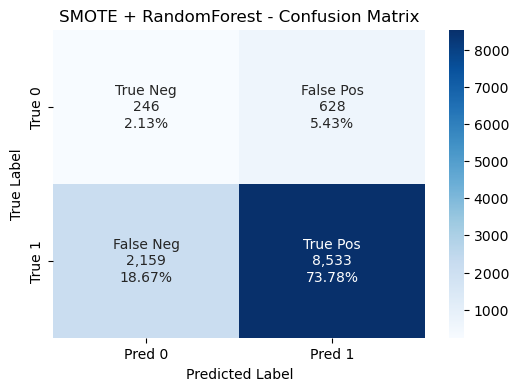

In [97]:
# 7. Evaluate using your custom functions
print("\n📊 Model Performance on Test Set:")
display(evaluate_model_classification(best_rf_model, X_test, y_test))

# 8. Plot confusion matrix using your annotated heatmap function
plot_confusion_matrix_annotated(best_rf_model, X_test, y_test, title="SMOTE + RandomForest - Confusion Matrix")



📊 Model Evaluation at Threshold = 0.3


,Accuracy,Precision,Recall,F1 Score
Threshold 0.3,0.873509,0.926755,0.937243,0.931969


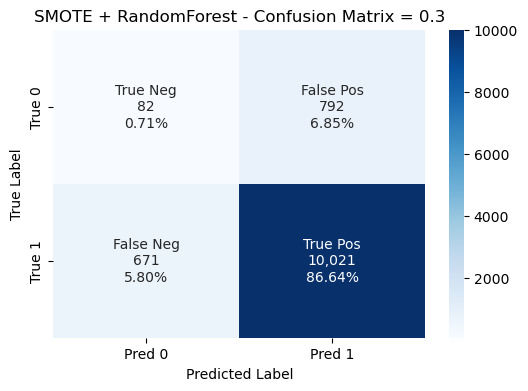

In [98]:
# === Apply threshold-based evaluation ===
threshold = 0.3

print(f"\n📊 Model Evaluation at Threshold = {threshold}")
display(evaluate_with_threshold(best_rf_model, X_test, y_test, threshold=threshold))

# === Plot updated confusion matrix ===
plot_confusion_matrix_with_threshold(best_rf_model, X_test, y_test, threshold=threshold, 
                                     title="SMOTE + RandomForest - Confusion Matrix")


## Random Forest Model with SMOTE and Threshold Tuning

### Objective
To build a robust model that predicts **startup success** using structured investment and company data. The primary business goal is to **maximize recall** — we want to catch as many successful startups as possible, even at the cost of tolerating some false positives.

---

### Modeling Pipeline Overview

1. **Train-Test Split**
   - Stratified 70-30 split to ensure class distribution is preserved.
   - `X_train`, `X_test`, `y_train`, `y_test` formed the basis of model training and evaluation.

2. **Class Imbalance Handling: SMOTE**
   - The training set was imbalanced (more successes than failures).
   - SMOTE (Synthetic Minority Over-sampling Technique) was applied to oversample the minority class (`target = 0`) during training.

3. **Random Forest Classifier**
   - A non-linear, ensemble-based classifier capable of capturing complex feature interactions.
   - Used within a pipeline with SMOTE to ensure seamless handling of imbalanced data.

4. **Hyperparameter Tuning with GridSearchCV**
   - Grid search was conducted over the following parameter ranges:
     - `n_estimators`: 100, 200
     - `max_depth`: 10, 20, None
     - `min_samples_split`: 2, 5
     - `class_weight`: None, 'balanced'
   - Scoring metric: **F1 score**

5. **Evaluation Metrics**
   - The model was evaluated using:
     - Accuracy
     - Precision
     - **Recall** (primary focus)
     - F1 Score
     - Confusion Matrix

---

### Threshold Tuning: Maximizing Recall

By default, Random Forest predicts class 1 if `P(success) >= 0.5`.  
To **increase recall**, we evaluated the model at a **custom threshold = 0.30**.

| Metric     | Value     |
|------------|-----------|
| Accuracy   | 87.4%     |
| Precision  | 92.7%     |
| **Recall** | **93.7%** |
| F1 Score   | 93.2%     |

---

### Confusion Matrix @ Threshold = 0.30

| Actual \ Predicted | Predicted Fail (0) | Predicted Success (1) |
|--------------------|---------------------|------------------------|
| **Fail (0)**       | 82 (True Neg)       | 792 (False Pos)        |
| **Success (1)**    | 671 (False Neg)     | 10,021 (True Pos)      |

- High number of **true positives**
- Small increase in false positives is acceptable for our business use case
- **Recall is prioritized**, aligning perfectly with startup screening goals

---

### Why This Model Works Well

- Captures **non-linear relationships** better than logistic regression.
- Balances **bias-variance tradeoff** through ensemble averaging.
- Handles high-dimensional features and **categorical encodings effectively**.
- Responds very well to **threshold tuning** for business-aligned recall optimization.

---


## 🔄 Model Comparison: Logistic Regression vs Random Forest

This section compares the performance of two classification models — **Logistic Regression** and **Random Forest** — both enhanced using **SMOTE for class imbalance** and **threshold tuning** to prioritize **recall**. The goal is to minimize missed successful startups while maintaining a strong balance with precision.

---

### 🎯 Business Goal
Maximize **recall**: Detect as many **successful startups** (`target = 1`) as possible, even at the expense of some false positives.

---

### 🧪 Evaluation Metrics Comparison

| Metric              | Logistic Regression (Threshold = 0.45) | Random Forest (Threshold = 0.30) |
|---------------------|----------------------------------------|----------------------------------|
| **Accuracy**        | 91.9%                                  | 87.4%                            |
| **Precision**       | 92.4%                                  | 92.7%                            |
| **Recall**          | ✅ **99.4%**                            | ✅ **93.7%**                      |
| **F1 Score**        | 95.8%                                  | 93.2%                            |

---

### 📊 Confusion Matrix Comparison

| Confusion Category  | Logistic Regression | Random Forest       |
|---------------------|---------------------|---------------------|
| True Positives (TP) | 10,627              | 10,021              |
| False Positives (FP)| 869                 | 792                 |
| False Negatives (FN)| ✅ 65               | 671                 |
| True Negatives (TN) | 5                   | ✅ 82               |

- ✅ Logistic Regression caught almost **all successes**, with only 65 missed cases.
- Random Forest had slightly **more misses (FN)** but produced **fewer false alarms (FP)** and **more true negatives**.

---

### ⚙️ Model Behavior Insights

| Aspect                      | Logistic Regression             | Random Forest                     |
|-----------------------------|----------------------------------|-----------------------------------|
| **Model Type**             | Linear                           | Ensemble (Bagged Decision Trees)  |
| **Handles Non-Linearity**  | ❌ No                             | ✅ Yes                            |
| **Interpretability**       | ✅ High (coefficients)           | Medium (requires feature importance) |
| **Overfitting Risk**       | Low                              | Moderate (controlled via tuning)  |
| **Speed of Training**      | Fast                             | Slower                            |
| **Custom Threshold Support** | ✅ Tuned at 0.45                | ✅ Tuned at 0.30                  |

---

### 🧠 Final Recommendation

- **Choose Logistic Regression** if:
  - Your **top priority is recall**
  - You want a simple and explainable model
  - You're okay with more false positives in favor of catching nearly every success

- **Choose Random Forest** if:
  - You want a more balanced classifier
  - You care about reducing false positives while still maintaining high recall
  - You want to capture **non-linear feature interactions**

---

### 📌 Summary

| Decision Factor       | Recommended Model     |
|-----------------------|------------------------|
| Maximize Recall       | ✅ **Logistic Regression** |
| Balanced Performance  | ✅ **Random Forest**       |
| Model Explainability  | Logistic Regression     |
| Complex Feature Patterns | Random Forest         |

---

**Next Steps:**
- Consider evaluating **feature importance** (for interpretability).
- Compare with **XGBoost** for advanced boosting performance.
- Plot **precision-recall vs threshold curves** for deeper insight.



## Prediction Setup for Both Models

In [104]:
# Example new startup input — adjust values as needed
new_startup = {
    'funding_total_usd': 13947518.88,
    'funding_rounds': 2,
    'seed': 244490.93,
    'venture': 8156230.41,
    'equity_crowdfunding': 6949.61,
    'undisclosed': 99807.72,
    'convertible_note': 24173.70,
    'debt_financing': 1997621.11,
    'angel': 72422.73,
    'grant': 173185.53,
    'private_equity': 2188008.90,
    'post_ipo_equity': 589587.54,
    'post_ipo_debt': 355797.62,
    'secondary_market': 31641.44,
    'product_crowdfunding': 7601.65,
    'round_A': 1304948.79,
    'round_B': 1673699.52,
    'round_C': 1385676.46,
    'round_D': 883803.77,
    'round_E': 414216.73,
    'round_F': 209778.05,
    'round_G': 73858.95,
    'round_H': 18250.20,
    'market_bin_Top5': 0,
    'country_bin_USA': 1,
    'funding_period_months': 12
}


# Convert to DataFrame
new_df = pd.DataFrame([new_startup])

## Logistic Regression Prediction

In [106]:
# Predict using Logistic Regression model
logreg_prob = best_model.predict_proba(new_df)[0, 1]
logreg_pred = 1 if logreg_prob >= 0.45 else 0

print(f"[Logistic Regression] Prediction: {'Success' if logreg_pred == 1 else 'Failure'} — Probability: {logreg_prob:.2%}")


[Logistic Regression] Prediction: Success — Probability: 55.55%


## Random Forest Prediction

In [108]:
# Predict using Random Forest model
rf_prob = best_rf_model.predict_proba(new_df)[0, 1]
rf_pred = 1 if rf_prob >= 0.30 else 0

print(f"[Random Forest] Prediction: {'Success' if rf_pred == 1 else 'Failure'} — Probability: {rf_prob:.2%}")

[Random Forest] Prediction: Success — Probability: 45.95%


##  Dual-Model Deployment (LogReg + RF)

In [ ]:
#import gradio as gr
#import pandas as pd
#import joblib

In [ ]:
#Save the models
#joblib.dump(best_model, "logistic_model.pkl")
#joblib.dump(best_rf_model, "random_forest_model.pkl")

In [ ]:
#Load models
#logreg = joblib.load("logistic_model.pkl")
#rf = joblib.load("random_forest_model.pkl")

# Define a prediction function
#def predict_startup_success(*args, model_choice):
 #   try:
  #      input_dict = dict(zip(X.columns, args))
   #     input_df = pd.DataFrame([input_dict])
    #    
     #   model = logreg if model_choice == 'Logistic' else rf
      #  prob = model.predict_proba(input_df)[:, 1][0]
       # threshold = 0.45 if model_choice == 'Logistic' else 0.30
        #prediction = "Success ✅" if prob >= threshold else "Failure ❌"
        #return f"{prediction} — Probability: {prob:.2%}"
    
    #except Exception as e:
        #return f"⚠️ Prediction Error: {str(e)}"

In [ ]:
#inputs = [gr.Number(label=col) for col in X.columns]
#model_selector = gr.Radio(['Logistic', 'RandomForest'], label="Choose Model")

In [ ]:
# Set up the interface
#demo = gr.Interface(
 #   fn=predict_startup_success,
 #   inputs=inputs + [model_selector],
 #   outputs=gr.Textbox(label="Prediction Result"),
 #   title="Startup Success Predictor",
 #   description="Enter startup details to predict success using Logistic Regression or Random Forest"
#)


In [ ]:
#demo.launch()